# Total Variation

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

## implementation of Lasso

In [2]:
import sys
sys.path += ['..', '../primaldual']

from lasso import Lasso

### try the implemented Lasso

toy data

In [3]:
np.random.seed(0)
n_samples = 1000
n_features = 500
n_components = 10
X = np.random.randn(n_samples, n_features).astype(np.float32)
w_true = np.zeros(n_features).astype(np.float32)
w_true[np.random.randint(0, n_features, n_components)] = np.random.randn(n_components)
y = X.dot(w_true)

alpha = 0.01
beta = 0.5
max_iter = 1000

Lasso

In [4]:
%%time
clf = Lasso(alpha = alpha, beta = beta, max_iter = max_iter, extended_output = False)
clf.fit(X, y)

100%|██████████| 1000/1000 [00:00<00:00, 7766.74it/s]

CPU times: user 285 ms, sys: 42.8 ms, total: 327 ms
Wall time: 142 ms


objective function

In [11]:
# plt.plot(clf.objective_function[:])
# plt.grid(False)

result

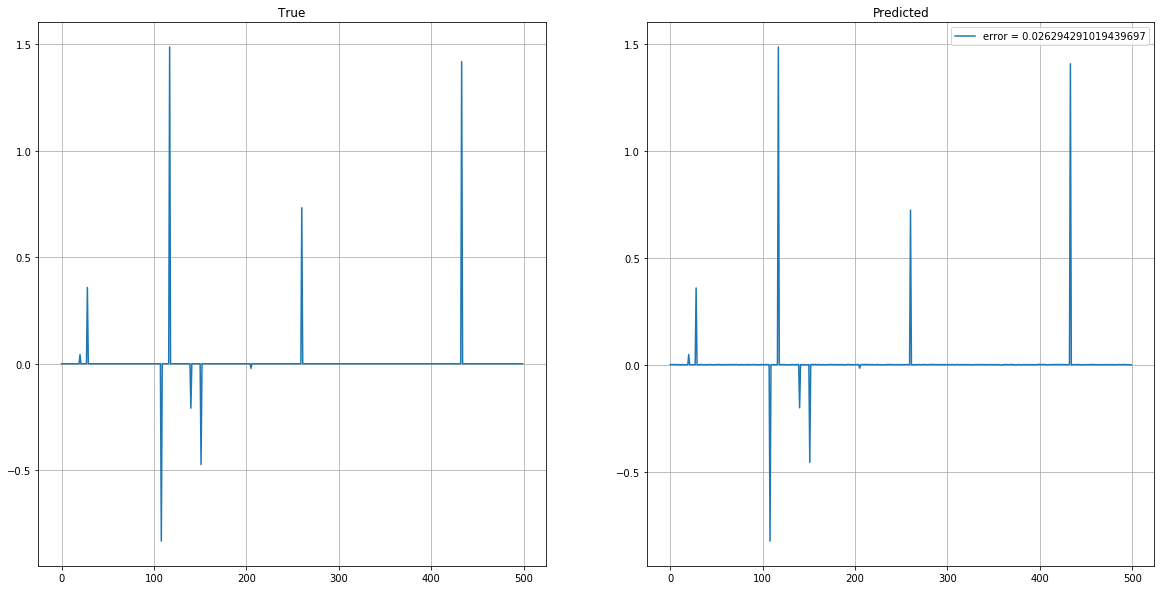

In [6]:
error = np.linalg.norm(w_true - clf.coef_)

plt.figure(figsize=(20, 10))

plt.subplot(1,2,1)
plt.plot(w_true)
plt.title('True')
plt.grid()

plt.subplot(1,2,2)
plt.plot(clf.coef_, label=f'error = {error}')
plt.title('Predicted')
plt.legend()
plt.grid()

Lasso (scikit-learn)

In [7]:
from sklearn.linear_model import Lasso as skLasso

In [8]:
%%time
skclf = skLasso(alpha = alpha, max_iter = max_iter, tol = 1e-32)
skclf.fit(X, y)

CPU times: user 63.6 ms, sys: 1.99 ms, total: 65.6 ms
Wall time: 64.1 ms


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


result

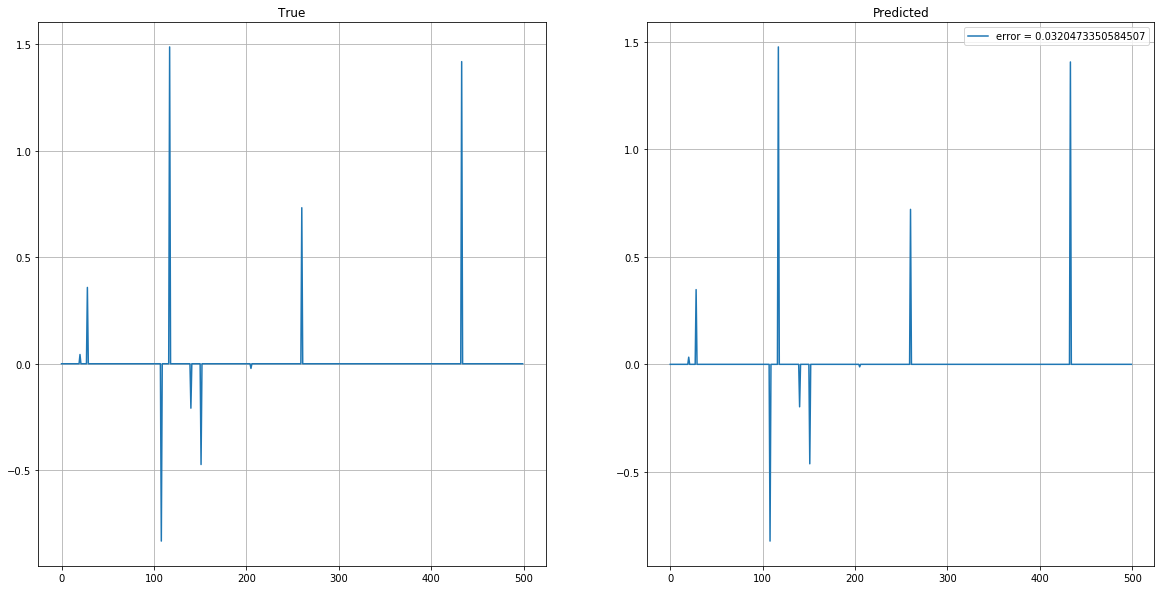

In [9]:
skerror = np.linalg.norm(w_true - skclf.coef_)

plt.figure(figsize=(20, 10))

plt.subplot(1,2,1)
plt.plot(w_true)
plt.title('True')
plt.grid()

plt.subplot(1,2,2)
plt.plot(skclf.coef_, label=f'error = {skerror}')
plt.title('Predicted')
plt.legend()
plt.grid()

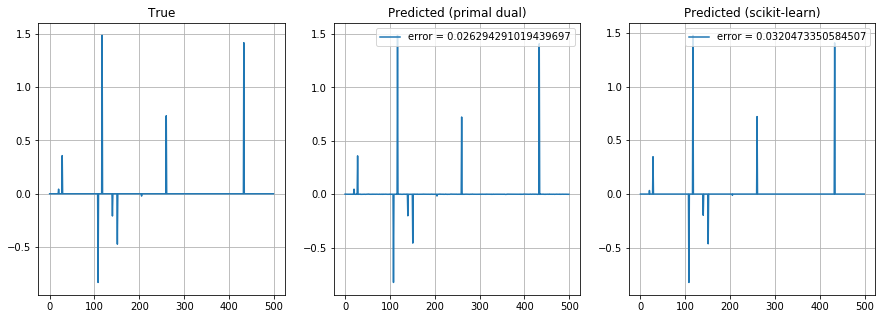

In [10]:
error = np.linalg.norm(w_true - clf.coef_)

plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
plt.plot(w_true)
plt.title('True')
plt.grid()

plt.subplot(1,3,2)
plt.plot(clf.coef_, label=f'error = {error}')
plt.title('Predicted (primal dual)')
plt.legend(loc='upper right')
plt.grid()

plt.subplot(1,3,3)
plt.plot(skclf.coef_, label=f'error = {skerror}')
plt.title('Predicted (scikit-learn)')
plt.legend(loc='upper right')
plt.grid()

plt.savefig('../data/lasso.png')